In [344]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv('Clinical data/clinical_data.csv', index_col=0)

for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].fillna(df[col].mode()[0])
    else:
        df[col] = df[col].fillna(df[col].mean())

In [345]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid", font_scale=1.1)

def boxplot(data, column):
    plt.figure(figsize=(8,5))

    ax = sns.boxplot(
        data=data,
        y=column,
        palette='pastel',
        notch=True,
        width=0.2
    )

    ax.set_title(f'{column}', fontsize=14, weight='bold')
    ax.set_ylabel(column, fontsize=12)
    plt.ylim(bottom=-1)
    sns.despine(left=True, bottom=True)
    plt.tight_layout()
    plt.savefig(rf'images/boxplots/{column}.png', transparent=True, bbox_inches='tight')



def barplot(data, column):
    plt.figure(figsize=(8,5))


    ax = sns.countplot(
        data=data,
        x=column,
        hue=column,
        palette='pastel',
        width=0.6
    )

    ax.set_title(f'{column}', fontsize=14, weight='bold')
    ax.set_ylabel(column, fontsize=12)
    sns.despine(left=True, bottom=True)
    plt.tight_layout()
    plt.savefig(rf'images/barplots/{column}.png', transparent=True, bbox_inches='tight')

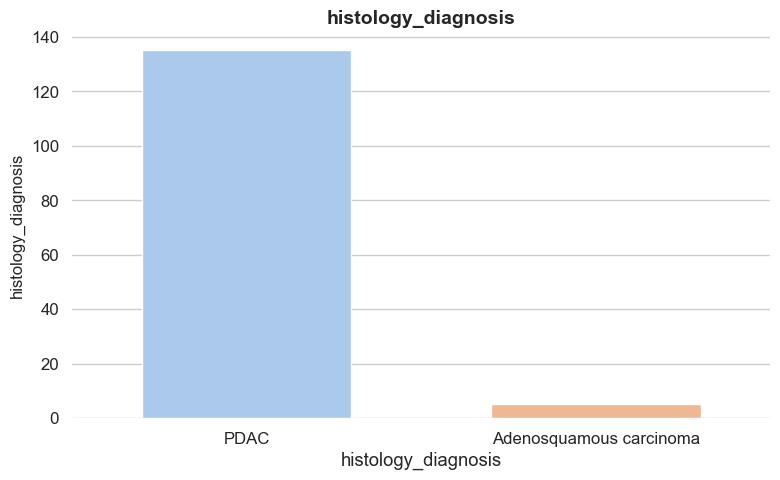

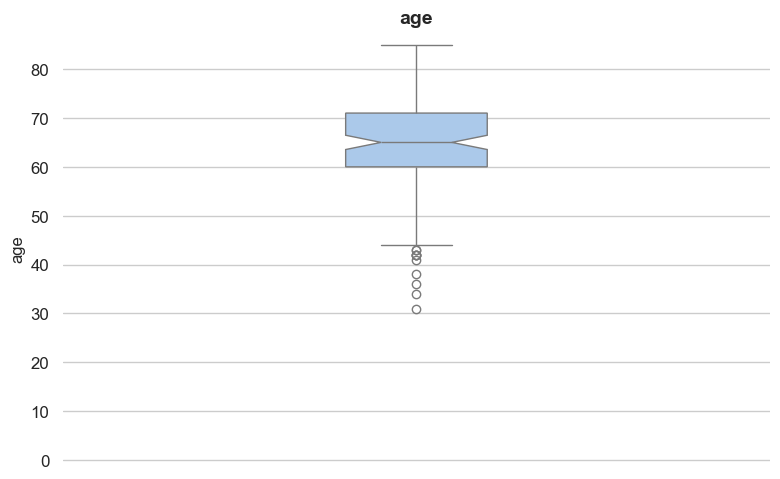

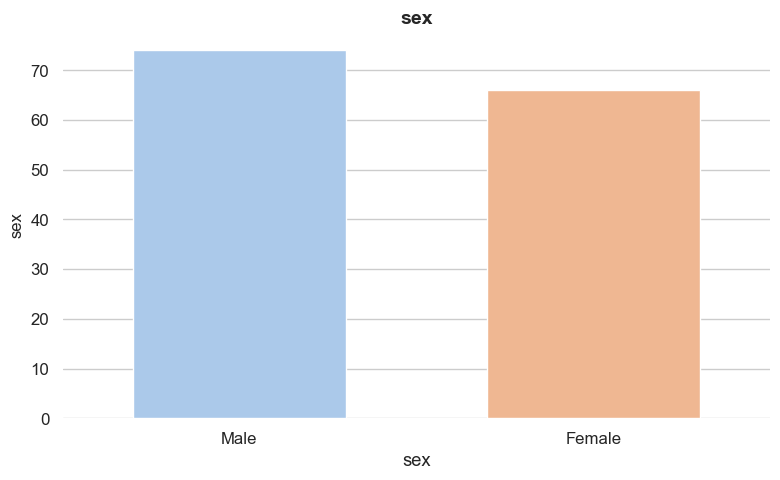

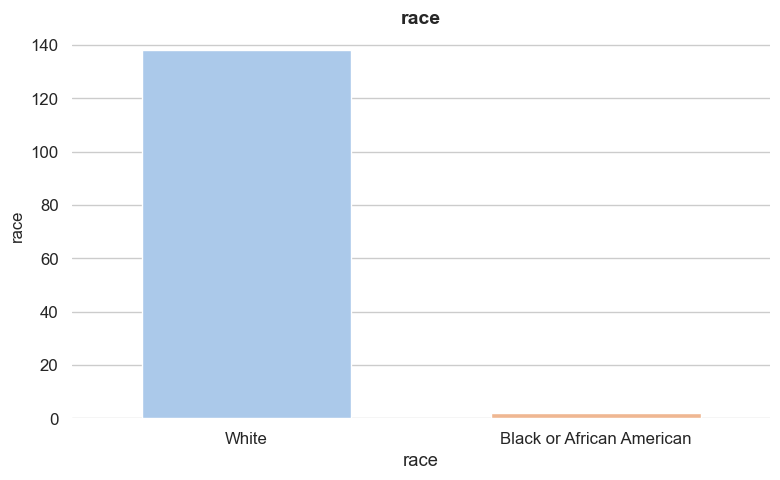

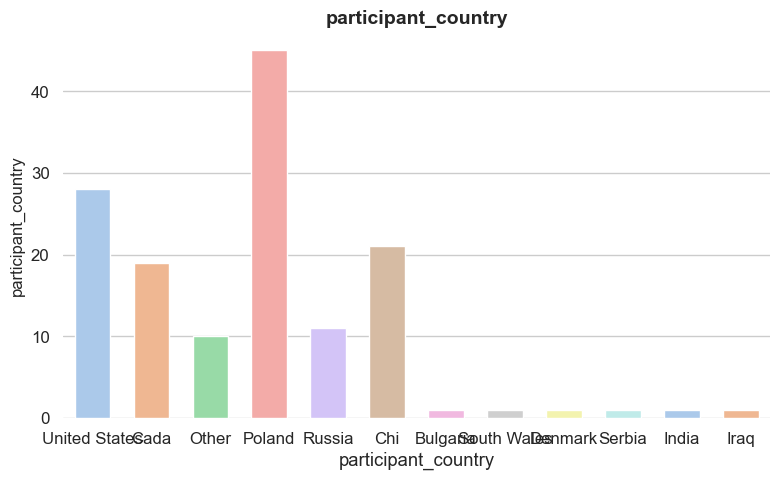

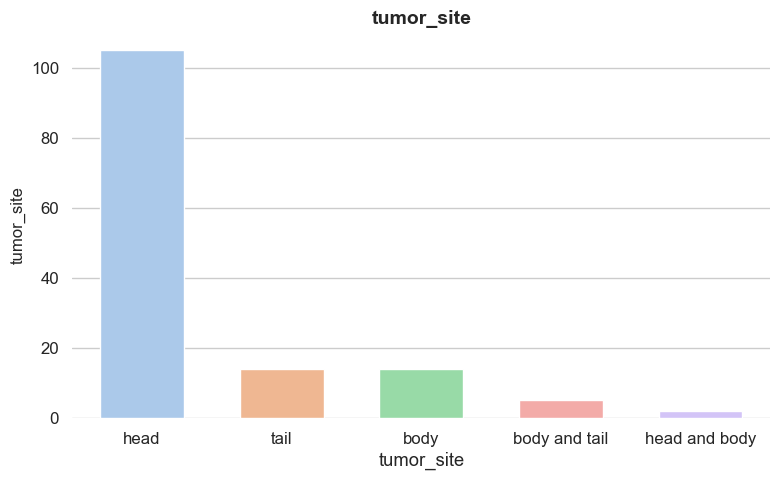

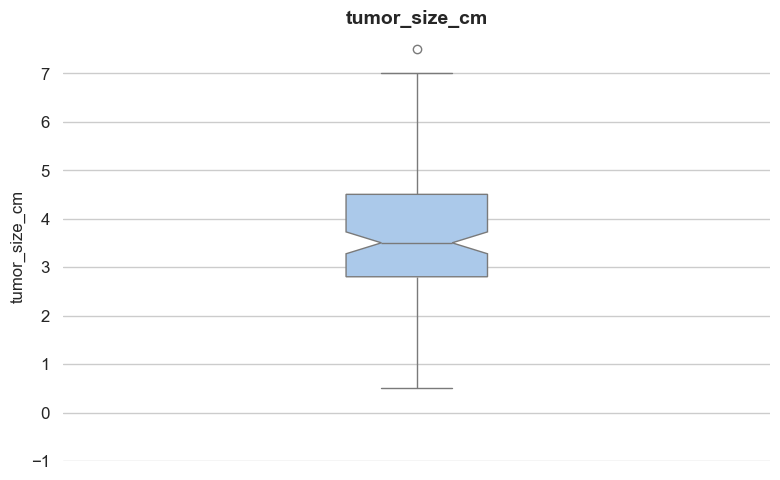

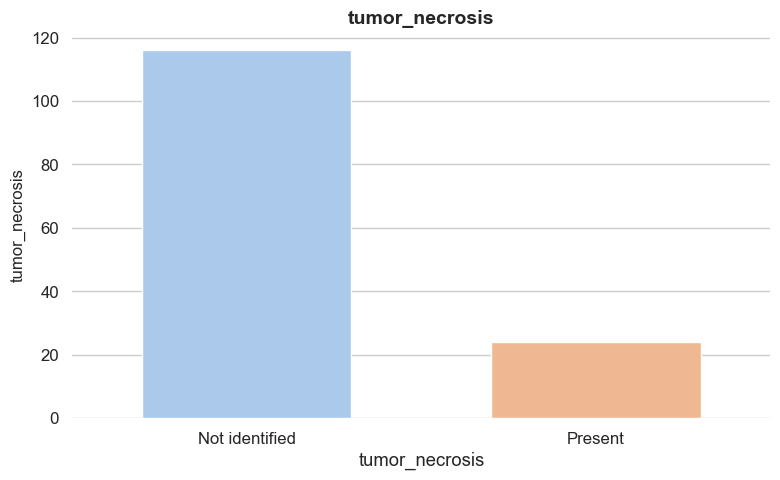

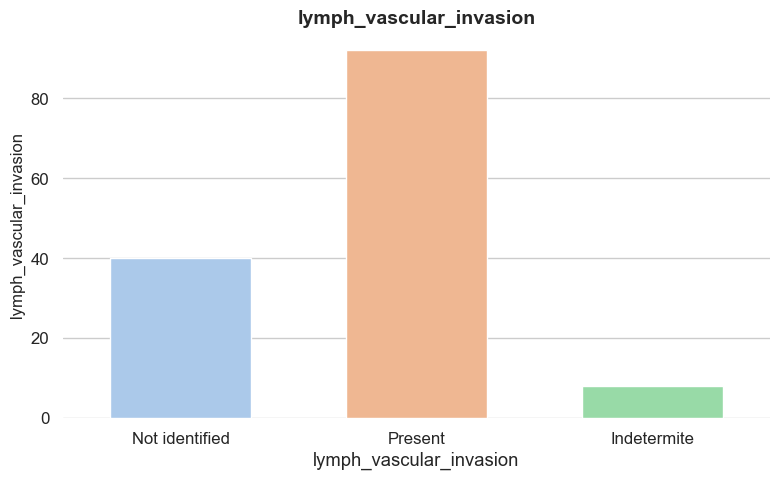

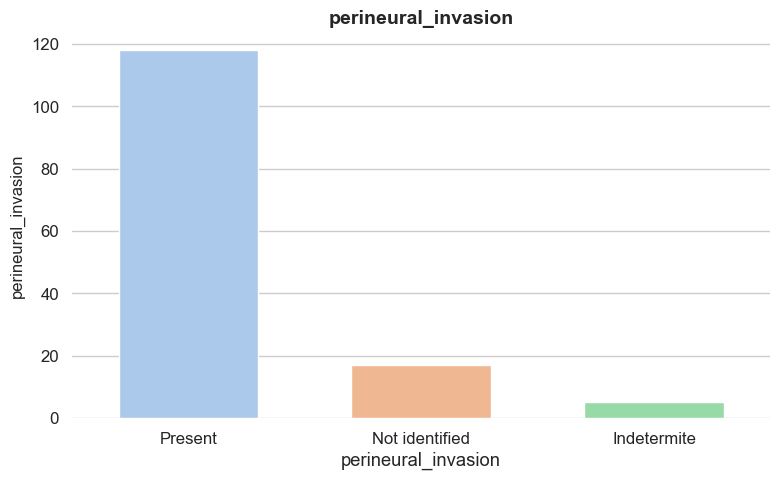

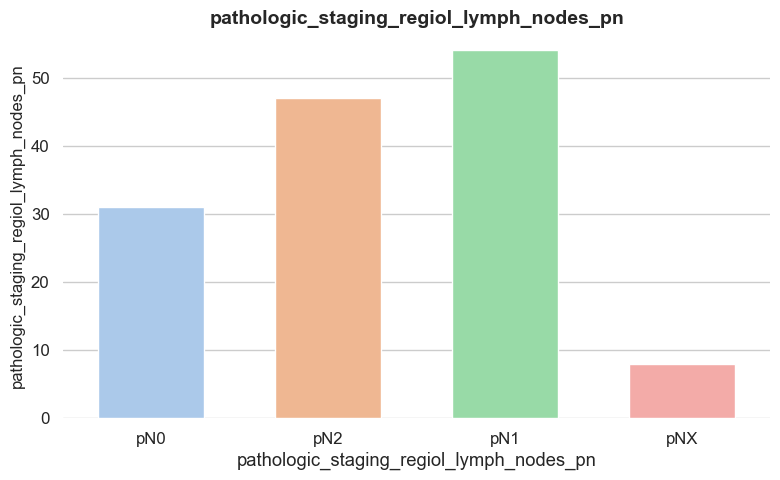

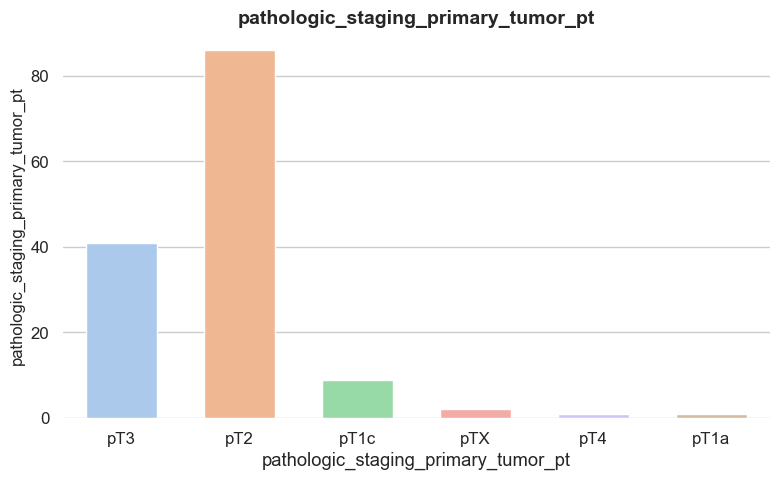

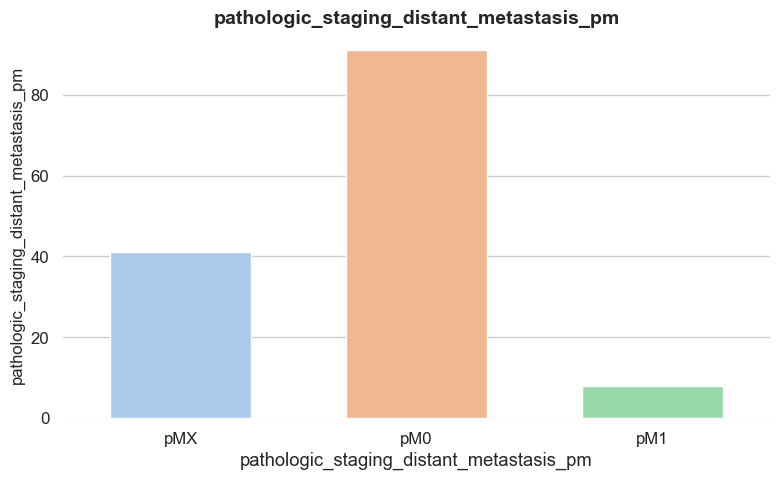

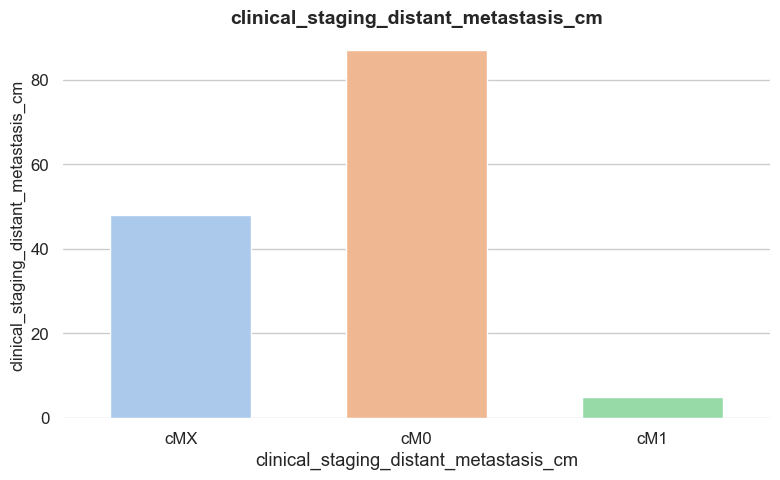

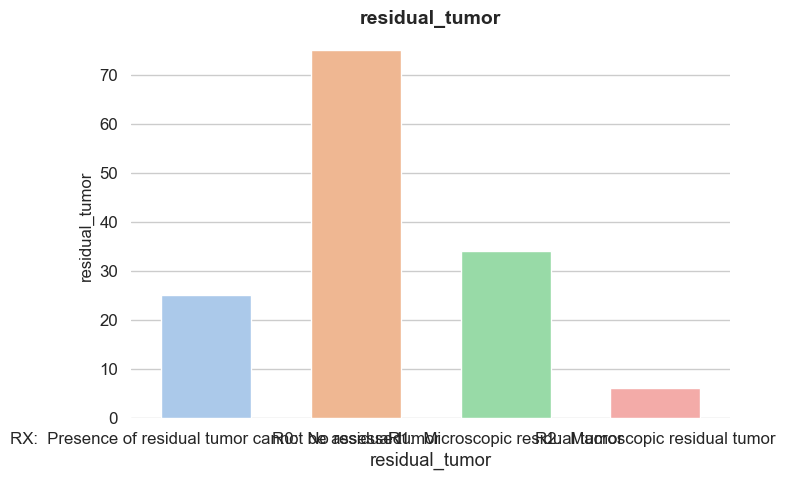

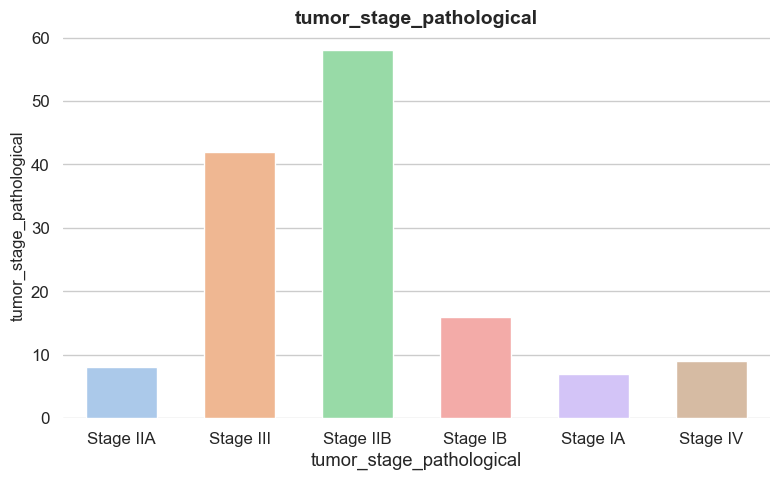

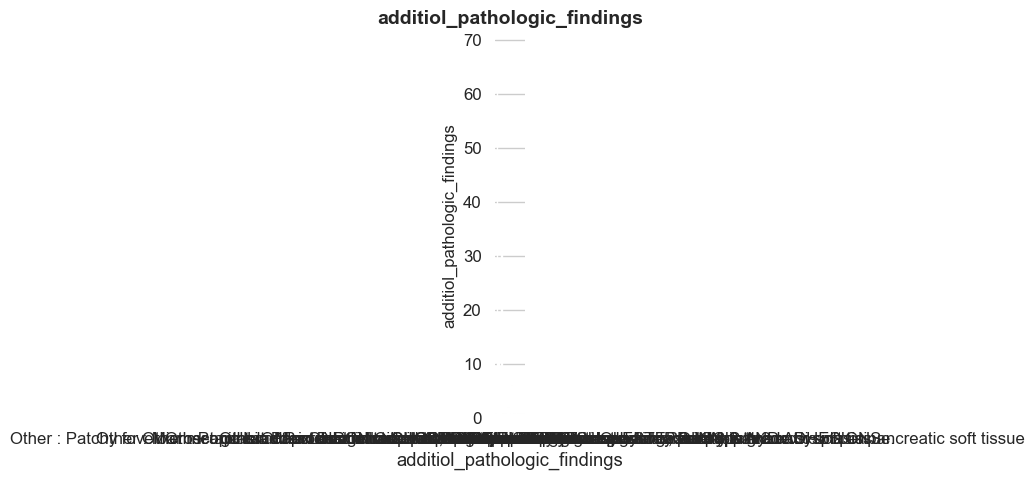

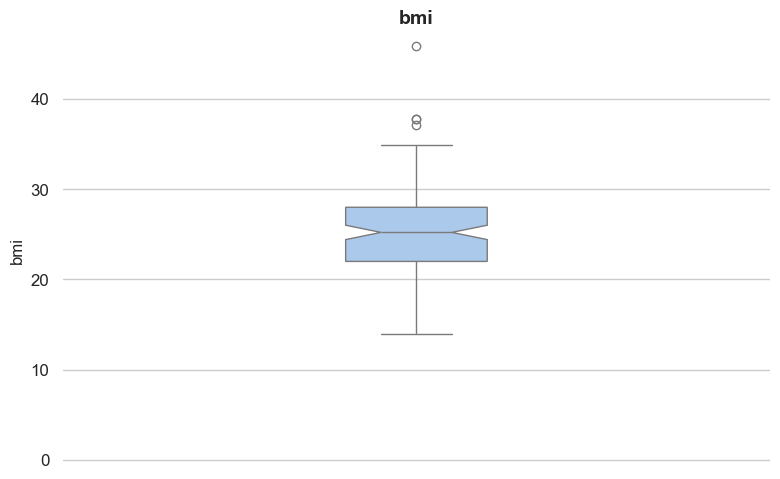

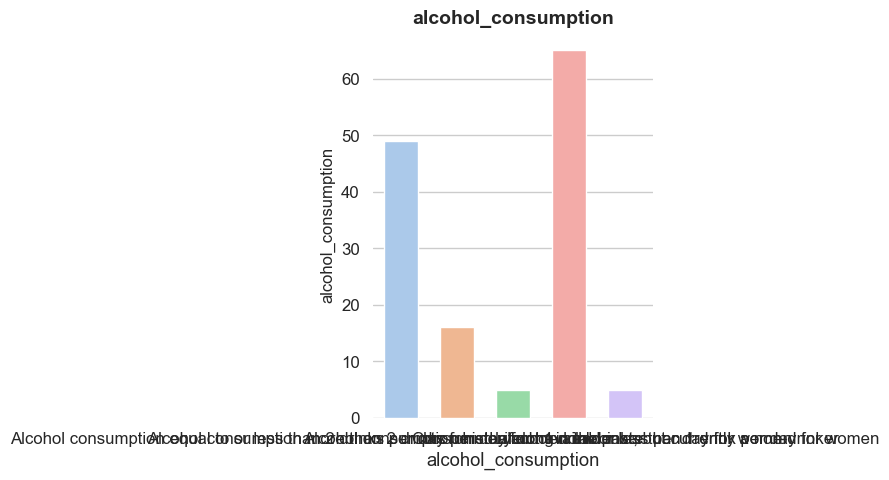

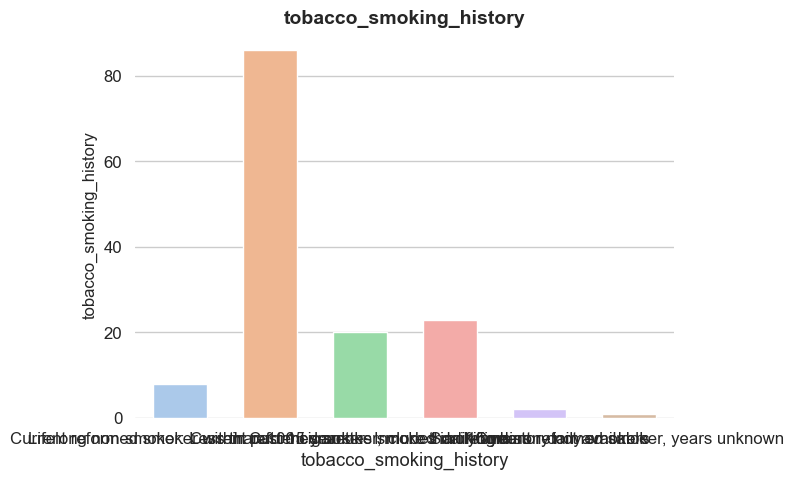

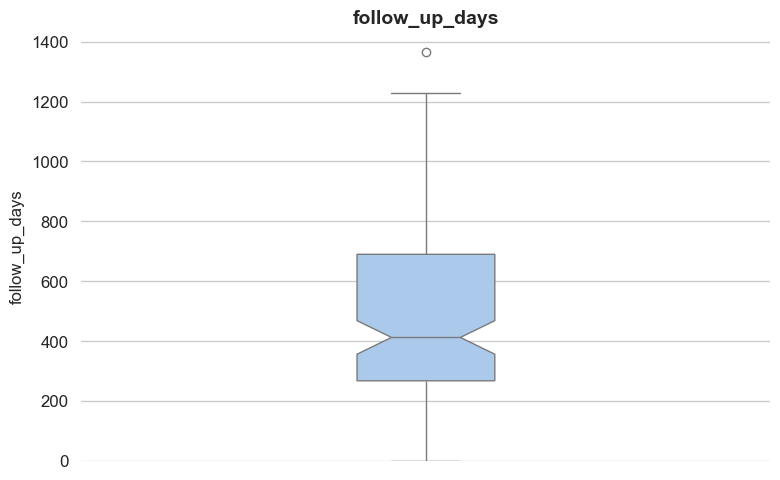

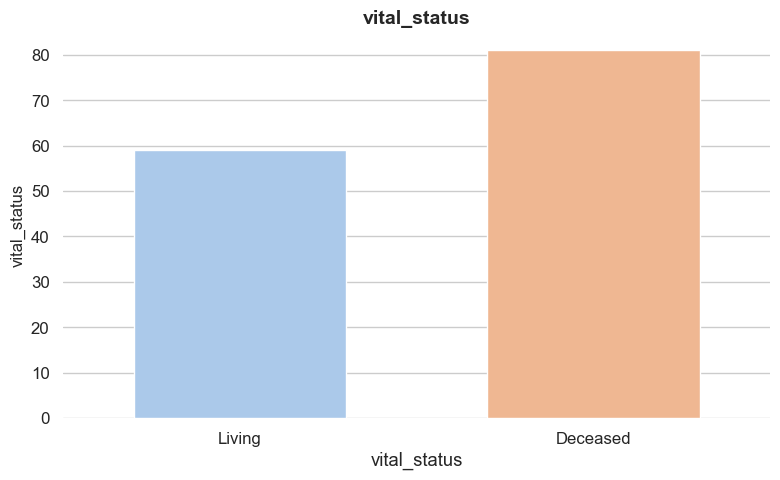

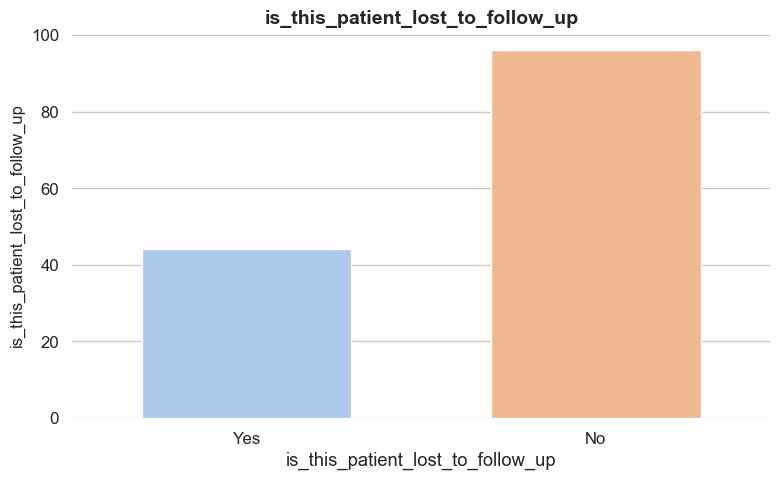

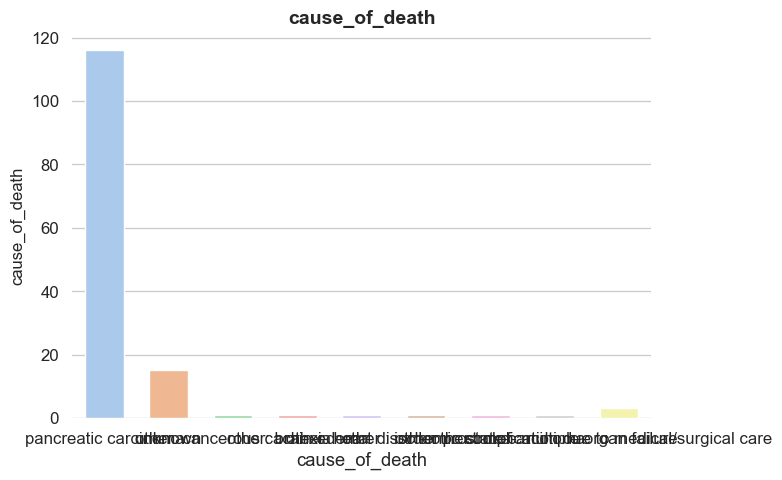

In [346]:
for col in df.columns:
    if df[col].dtype == 'object':
        barplot(df, col)
    else:
        boxplot(df, col)

In [347]:
for col in df.columns:
    if df[col].dtype == 'object':
        print(f"{col}: {df[col].unique()}")

histology_diagnosis: ['PDAC' 'Adenosquamous carcinoma']
sex: ['Male' 'Female']
race: ['White' 'Black or African American']
participant_country: ['United States' 'Cada' 'Other' 'Poland' 'Russia' 'Chi' 'Bulgaria'
 'South Wales' 'Denmark' 'Serbia' 'India' 'Iraq']
tumor_site: ['head' 'tail' 'body' 'body and tail' 'head and body']
tumor_necrosis: ['Not identified' 'Present']
lymph_vascular_invasion: ['Not identified' 'Present' 'Indetermite']
perineural_invasion: ['Present' 'Not identified' 'Indetermite']
pathologic_staging_regiol_lymph_nodes_pn: ['pN0' 'pN2' 'pN1' 'pNX']
pathologic_staging_primary_tumor_pt: ['pT3' 'pT2' 'pT1c' 'pTX' 'pT4' 'pT1a']
pathologic_staging_distant_metastasis_pm: ['pMX' 'pM0' 'pM1']
clinical_staging_distant_metastasis_cm: ['cMX' 'cM0' 'cM1']
residual_tumor: ['RX:  Presence of residual tumor cannot be assessed'
 'R0:  No residual tumor' 'R1:  Microscopic residual tumor'
 'R2:  Macroscopic residual tumor']
tumor_stage_pathological: ['Stage IIA' 'Stage III' 'Stage IIB'